<a href="https://colab.research.google.com/github/melvinwevers/100-pandas-puzzles/blob/master/02-getting-data/02_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "numpy<2,>=1.13" "pandas~=1.1" "matplotlib<4,>=2.1" "lxml>=3.7" "nltk>=3.2" "beautifulsoup4>=4.6" "pypdf2>=1.26" "networkx>=2.8" "scipy<2,>=0.18" "scikit-learn>=0.19" "xlrd<2,>=1.0" "mpl-axes-aligner<2,>=1.1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mpl-axes-aligner: filename=mpl_axes_aligner-1.3-py3-none-any.whl size=4756 sha256=de2b4b145027279d2251f61bc9bd0d50d49a42797ae6cbf36dc3467df4952078
  Stored in directory: /root/.cache/pip/wheels/7d/57/ec/c27bcb29ff0f39ee5a71ed59474a92503b2a0112f4a283429b
Successfully built mpl-axes-aligner
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


In [3]:
!git clone https://github.com/CANAL-amsterdam/Foundations-of-Cultural-and-Social-Data-Analysis
%cd Foundations-of-Cultural-and-Social-Data-Analysis/02-getting-data
!ls

Cloning into 'Foundations-of-Cultural-and-Social-Data-Analysis'...
remote: Enumerating objects: 953, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 953 (delta 10), reused 7 (delta 1), pack-reused 921
Receiving objects: 100% (953/953), 193.36 MiB | 23.26 MiB/s, done.
Resolving deltas: 100% (89/89), done.
Updating files: 100% (956/956), done.
/content/Foundations-of-Cultural-and-Social-Data-Analysis/02-getting-data
02_chapter.ipynb  02_exercises.ipynb  data  hamlet.json  shakespeare.json


In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import collections
import lxml.etree
import json

In [5]:
NSMAP = {'tei': 'http://www.tei-c.org/ns/1.0'}


def character_network(tree):
    """Construct a character interaction network.

    Construct a character interaction network for Shakespeare texts in
    the Folger Digital Texts collection. Character interaction networks
    are constructed on the basis of successive speaker turns in the texts,
    and edges between speakers are created when their utterances follow
    one another.

    Arguments:
        tree: An lxml.ElementTree instance representing one of the XML
            files in the Folger Shakespeare collection.

    Returns:
        A character interaction network represented as a weighted,
        undirected NetworkX Graph.

    """
    G = nx.Graph()
    # extract a list of speaker turns for each scene in a play
    for scene in tree.iterfind('.//tei:div2[@type="scene"]', NSMAP):
        speakers = scene.findall('.//tei:sp', NSMAP)
        # iterate over the sequence of speaker turns...
        for i in range(len(speakers) - 1):
            # ... and extract pairs of adjacent speakers
            try:
                speaker_i = speakers[i].attrib['who'].split('_')[0].replace('#', '')
                speaker_j = speakers[i + 1].attrib['who'].split('_')[0].replace('#', '')
                # if the interaction between two speakers has already
                # been attested, update their interaction count
                if G.has_edge(speaker_i, speaker_j):
                    G[speaker_i][speaker_j]['weight'] += 1
                # else add an edge between speaker i and j to the graph
                else:
                    G.add_edge(speaker_i, speaker_j, weight=1)
            except KeyError:
                continue
    return G

## Exercises
### Easy
1. The Dutch writer <span class="index">Joost van den Vondel</span> is often seen as one of the most important Dutch
   playwrights of the seventeenth century. The file `data/vondel-stcn.csv` consists of 335
   bibliographic records of his work as recorded by the <span class="index">Short-Title Catalogue</span>, Netherlands
   (STCN). Use Python's `csv` module to read this file into a list of records. Each
   record, then, should be a `list` with four elements: (i) the year of publication, (ii)
   the title, (iii) the name of the author, and (iv) the name of the publisher.
2. Use the `Counter` object from the `collections` module to construct a frequency
   distribution of Vondel's publishers. Print the five most common publishers.
3. The place name of publication of Vondel's works is included in the publisher name. For
   this exercise you may assume that the place name is the last word of the string. Write
   a procedure to extract all place names, and store those in a list. Use the `Counter`
   object to construct a frequency distribution and print the five most common place
   names.

### Moderate
1. In this exercise, we'll ask you to create and draw a character network for
   Shakespeare's <span class="index">*Romeo and Juliet*</span> and <span class="index">*Othello*</span>. The XML encoded plays can be found at
   `data/folger/xml/Rom.xml` and `data/folger/xml/Oth.xml`. Compare the two visualizations
   to that of *Hamlet*. Comment on any differences you observe.
2. Print the number of nodes and edges for each of the three networks (i.e., including the
   graph for *Hamlet*). Which network has the largest number of nodes? And which has the
   largest number of edges?
3. The character network of *Hamlet* has 38 nodes and 73 edges. However, many other edges
   between nodes *could* exist. That is to say, Shakespeare could have chosen to have
   other and more characters interact with each other. The extent to which this potential
   is used is called the density of a network. <span class="index">Network density</span> is computed as the number
   of realized edges divided by the number of potential edges. NetworkX provides the
   function `nx.density()` to compute the density of a network. Use this function to compute
   the density of the three character networks. Which network has the highest density? How
   do the density values compare to the three visualizations?

### Challenging
1. In network theory, a number of mathematical concepts are commonly used to characterize the status, behavior or overall importance of an individual node in a network. The "<span class="index">degree</span>" of a node is an easy one, as it simply refers to the total number of edges which a node participates in (in an undirectional graph). Look up the documentation for this function in NetworkX online, and calculate for each text (i.e., *Romeo and Juliet*, *Othello*, and *Hamlet*) the three character nodes with the highest degrees. Do the results rank the titular protagonist highest in each play? *More challenging version*: the degree measure also has a "weighted" variant, which does not only inspect the number of edges but also their strength. Implement this variant and find out whether this changes the picture at all.
2. The <span class="index">Van Gogh letters project</span> has digitally encoded all surviving letters written and
   received by Vincent van Gogh (1853--1890). All letters have been encoded in XML
   following the TEI guidelines. The complete corpus of letters can be found in the folder
   `data/vangoghxml`. In this exercise, you need to use the lxml module to load and parse
   one of the letters. The XML encoded letters specify two namespaces at the root
   level. Thus, to easily extract certain tags, we want to specify a namespace map, which
   consists of keys and values for both namespaces. The namespace map you should use is:
   
   ```python
   NSMAP = {None: 'http://www.tei-c.org/ns/1.0',
            'vg': 'http://www.vangoghletters.org/ns/'}
   ```

   Load and parse the XML file `data/vangoghxml/let001.xml`. Then query the XML tree to
   find the author of the letter (using the tag `author`) and the addressee (using the tag
   `vg:addressee`).
3. There are 929 Van Gogh letters in total. In this exercise, you will need to extract the author
   and addressee of all letters. To do that, you will need to write a `for`-loop, which
   iterates over all XML files in `data/vangoghxml`. There are various ways to loop over
   all files in directory, but a very convenient way is to use the `os.scandir()` function
   in Python's `os` module. Make two lists, `authors` and `addressees`, in which you
   store the author and addressee of each letter. After that, answer the following three
   questions:
    1. How many letters were written by Vincent Van Gogh?
    2. How many letters did Vincent Van Gogh receive?
    3. To whom did Vincent Van Gogh write the most letters?

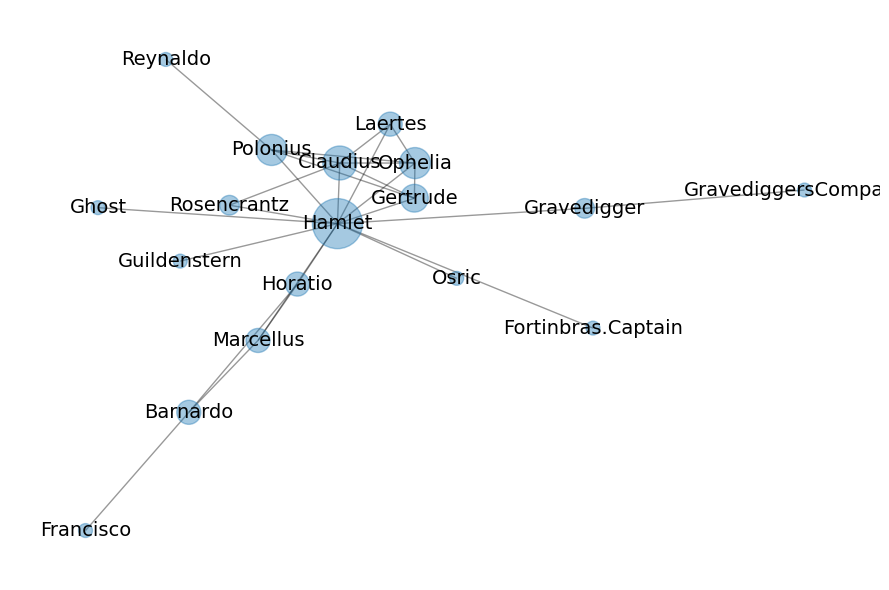

In [ ]:
import functools
from copy import deepcopy
from networkx.readwrite import json_graph

tree = lxml.etree.parse('data/folger/xml/Ham.xml')
G = character_network(tree.getroot())

with open('hamlet.json', 'w') as f:
    json.dump(json_graph.node_link_data(G), f)

with open('hamlet.json') as f:
    d = json.load(f)

G = json_graph.node_link_graph(d)
G1 = deepcopy(G)

for u, v, d in G.edges(data=True):
    if d["weight"] < 10:
        G1.remove_edge(u, v)

G1 = nx.relabel_nodes(G1, {"SOLDIERS.FORTINBRAS.Captain": "Fortinbras.Captain"})
# rename verbose name for Fortinbras' Captain
#SOLDIERS.FORTINBRAS.Captain

subgraphs = [G1.subgraph(c).copy() for c in nx.connected_components(G1)]
# functools.reduce is similar to foldl in Haskell and fold_left in OCaml
def larger_graph(graph1, graph2):
    return graph2 if len(graph2.nodes()) > len(graph1.nodes()) else graph1
G1 = functools.reduce(larger_graph, subgraphs, subgraphs[0])

fig = plt.figure(figsize=(9, 6))
pos = nx.spring_layout(G1, k=0.5, iterations=2000, seed=1)
nx.draw_networkx_edges(G1, pos, alpha=0.4)
nx.draw_networkx_nodes(G1, pos, node_size=[degree * 100 for _, degree in G1.degree()], alpha=0.4)
nx.draw_networkx_labels(G1, pos, font_size=14)
plt.axis('off')
plt.tight_layout()